# Select white individuals from db from those that have exome sequences

In [ ]:
#Load libraries
library(plyr)
library(tidyverse)
library(pander)
library(ggpubr)
library(rapportools)
library(ggplot2)
#Get working directory
getwd()
#Set working directory
setwd('/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb43978_OCT2020/dc2325_phenotypes')

In [2]:
# Clean workspace
rm(list=ls())

In [3]:
fam <- read.table("/gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_s200631.fam", sep=' ', header=F)
colnames(fam) <- c("FID","IID","fatherID", "motherID", "sex", "phenotype")
head(fam)
dim(fam)

,FID,IID,fatherID,motherID,sex,phenotype
,<int>,<int>,<int>,<int>,<int>,<int>
1,1434748,1434748,0,0,2,-9
2,5523981,5523981,0,0,1,-9
3,5023838,5023838,0,0,2,-9
4,4023729,4023729,0,0,1,-9
5,4442146,4442146,0,0,2,-9
6,5654789,5654789,0,0,2,-9


[1] 200643      6

In [1]:
# Import the database to R with all the variable codings. Memory needed 80GB
# bd <- read.table("/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb42495_updatedJune2020/ukb42495.tab", sep="\t", header=T)

In [3]:
#Number or rows in bd
dim(bd)
head(bd[,1, drop=FALSE])

[1] 502505   6613

,f.eid
,<int>
1,6025442
2,1000019
3,1000022
4,1000035
5,1000046
6,1000054


In [4]:
# Assign individual ID column to bd f.eid
names(bd)[1] <- "IID"
head(bd[,1, drop=FALSE])

,IID
,<int>
1,6025442
2,1000019
3,1000022
4,1000035
5,1000046
6,1000054


In [39]:
bd_pca <- bd %>%  
    select(IID,
           starts_with("f.22009"),
           starts_with("f.22006"),
           starts_with("f.21000")) %>%
    mutate(WES=if_else(IID%in%exomed_IID,"1","0"))
head(bd_pca)
dim(bd_pca)

In [5]:
# Select the 200K individuals from the full db
exomed_IID <- bd[bd$IID %in% fam$IID,]
exomed_ind <- exomed_IID[, "IID"]
# Save as csv file
#write.csv(exomed_ind,'112420_ukb42495_exomed_ind.csv', row.names = FALSE)
# Read csv file 
exomed_IID <- read.csv("/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb43978_OCT2020/dc2325_phenotypes/112420_ukb42495_exomed_ind.csv", header=T)

In [6]:
# Confirm dimensions of database
head(exomed_IID)
dim(exomed_IID)

,IID,f.21.0.0,f.21.1.0,f.21.2.0,f.21.3.0,f.23.0.0,f.23.1.0,f.23.2.0,f.23.3.0,f.31.0.0,⋯,f.130714.0.0,f.130715.0.0,f.130716.0.0,f.130717.0.0,f.131494.0.0,f.131495.0.0,f.131496.0.0,f.131497.0.0,f.132202.0.0,f.132203.0.0
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>
1,1000019,1,NA,NA,NA,0,NA,NA,NA,0,⋯,NA,NA,NA,NA,2008-02-01,50,NA,NA,NA,NA
2,1000035,1,NA,NA,NA,0,NA,NA,NA,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1000078,1,1,3,NA,0,0,0,NA,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1000081,3,NA,NA,NA,0,NA,NA,NA,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1000198,1,NA,NA,NA,0,NA,NA,NA,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1000210,1,NA,NA,NA,0,NA,NA,NA,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 200631   6613

In [13]:
# Filter db based on ethnicity variable
library(tidyverse)
ethnicity <- exomed_IID %>%
    select(IID, starts_with("f.21000"))
head(ethnicity)
dim(ethnicity)

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0
,<int>,<int>,<int>,<int>
1,1000019,1001,NA,NA
2,1000035,1001,NA,NA
3,1000078,1001,1001,1001
4,1000081,1001,NA,NA
5,1000198,1001,NA,NA
6,1000210,1001,NA,NA


[1] 200631      4

In [14]:
# Function to extract all the available answers for 4 visits
# and put them in one list
f<-function(x){
  visit<-c()
  for (i in 2:4){
    if (!is.na(x[i]))
    {visit<-c(visit,x[i])}
  }
  if(is.null(visit)){visit=NA}
  else{visit=as.numeric(visit)}
  return (visit)
}

# Apply the above function and remove NAs
ethnicity$visit<-apply(ethnicity, 1, f)
head(ethnicity)
dim(ethnicity)

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit
,<int>,<int>,<int>,<int>,<list>
1,1000019,1001,NA,NA,1001
2,1000035,1001,NA,NA,1001
3,1000078,1001,1001,1001,"1001, 1001, 1001"
4,1000081,1001,NA,NA,1001
5,1000198,1001,NA,NA,1001
6,1000210,1001,NA,NA,1001


[1] 200631      5

In [15]:
# Filter out individuals wih missing values in ethnicity: 212 ind total
ethnicity <- ethnicity %>%
  filter(!is.na(visit))
dim(ethnicity)

[1] 200419      5

In [16]:
# Identify the unique available codings in f.21000
code<-union(union(unique(ethnicity$f.21000.0.0),unique(ethnicity$f.21000.1.0)),unique(ethnicity$f.21000.2.0))

In [17]:
length(code)
code

[1] 23

[1] 1001    6 1003 1002 4001   -3 4002 3001 2001 3002 3004 2004    1    5 2003
[16] 2002 3003    3   -1 4003    2   NA    4

In [18]:
useful_code<-c(1001,1002,1003,1,-3,-1)
useful_code # would like to keep those that have different combinations of useful_code, output it as 9000 

[1] 1001 1002 1003    1   -3   -1

In [19]:
useless_code<-code[!code %in% useful_code] # the rest that don’t have the combinations above can be set as NA
useless_code<-useless_code[-which(is.na(useless_code))] # remove NA here in the vector
useless_code

[1]    6 4001 4002 3001 2001 3002 3004 2004    5 2003 2002 3003    3 4003    2
[16]    4

In [20]:
# Function to get the final code for ethnicity
f<-function(x){
  l=length(unique(x$visit))
  if (l==1){ # only one value available
    result=unique(x$visit)
  }
  else{ # more then one value available
    l=length(x$visit)
    for (i in 1:l){
      if (x$visit[i] %in% useless_code){result=NA; break} # inconsistent ones with conbination not wanted
      else {result=9000} # inconsistent ones with right conbination
    }
  }
  return(result)
}

# Apply the above function and remove NAs
ethnicity$new_ethnicity<-apply(ethnicity, 1, f)
head(ethnicity,1000)

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<dbl>
1,1000019,1001,NA,NA,1001,1001
2,1000035,1001,NA,NA,1001,1001
3,1000078,1001,1001,1001,"1001, 1001, 1001",1001
4,1000081,1001,NA,NA,1001,1001
5,1000198,1001,NA,NA,1001,1001
6,1000210,1001,NA,NA,1001,1001
7,1000224,1001,NA,NA,1001,1001
8,1000236,1001,NA,NA,1001,1001
9,1000255,1001,NA,NA,1001,1001


In [21]:
ethnicity[which(ethnicity$new_ethnicity%in%9000),]

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<dbl>
300,1007061,1002,NA,1001,"1002, 1001",9000
2348,1057984,-3,NA,1001,"-3, 1001",9000
2424,1059988,1001,1002,1001,"1001, 1002, 1001",9000
3153,1077383,1001,1002,NA,"1001, 1002",9000
4361,1108028,1001,1002,NA,"1001, 1002",9000
4436,1110004,1001,-3,NA,"1001, -3",9000
4495,1111668,1003,1001,NA,"1003, 1001",9000
5341,1133245,1003,1001,NA,"1003, 1001",9000
5601,1139512,1001,1003,1001,"1001, 1003, 1001",9000


In [22]:
ethnicity[which(ethnicity$IID%in%c(1109575,1198980,1298050,1328519,1357644,1449162,1450255)),]

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<dbl>
4419,1109575,1001,NA,6,"1001, 6",NA
7954,1198980,1003,NA,6,"1003, 6",NA
11922,1298050,4003,NA,2002,"4003, 2002",NA
13126,1328519,4002,-3,NA,"4002, -3",NA
18041,1449162,6,-3,NA,"6, -3",NA
18080,1450255,4002,6,NA,"4002, 6",NA


In [23]:
ethnicity_noNA<-ethnicity %>%
  filter(!is.na(new_ethnicity))
ethnicity_isNA <- ethnicity %>%
  filter(is.na(new_ethnicity))
head(ethnicity_noNA, 1000) # note: code generated here is numeric, not factor
dim(ethnicity_noNA)
dim(ethnicity)

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<dbl>
1,1000019,1001,NA,NA,1001,1001
2,1000035,1001,NA,NA,1001,1001
3,1000078,1001,1001,1001,"1001, 1001, 1001",1001
4,1000081,1001,NA,NA,1001,1001
5,1000198,1001,NA,NA,1001,1001
6,1000210,1001,NA,NA,1001,1001
7,1000224,1001,NA,NA,1001,1001
8,1000236,1001,NA,NA,1001,1001
9,1000255,1001,NA,NA,1001,1001


[1] 200307      6

[1] 200419      6

In [24]:
dim(ethnicity_noNA)
dim(ethnicity)

[1] 200307      6

[1] 200419      6

In [25]:
head(ethnicity_noNA, 50) # note: code generated here is numeric, not factor

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<dbl>
1,1000019,1001,NA,NA,1001,1001
2,1000035,1001,NA,NA,1001,1001
3,1000078,1001,1001,1001,"1001, 1001, 1001",1001
4,1000081,1001,NA,NA,1001,1001
5,1000198,1001,NA,NA,1001,1001
6,1000210,1001,NA,NA,1001,1001
7,1000224,1001,NA,NA,1001,1001
8,1000236,1001,NA,NA,1001,1001
9,1000255,1001,NA,NA,1001,1001


In [26]:
head(ethnicity_isNA, 50)
nrow(ethnicity_isNA)

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<dbl>
1,1109575,1001,NA,6,"1001, 6",NA
2,1184372,3001,3002,NA,"3001, 3002",NA
3,1191120,2002,2002,2004,"2002, 2002, 2004",NA
4,1194419,6,1001,NA,"6, 1001",NA
5,1198980,1003,NA,6,"1003, 6",NA
6,1298050,4003,NA,2002,"4003, 2002",NA
7,1328519,4002,-3,NA,"4002, -3",NA
8,1357544,6,-3,NA,"6, -3",NA
9,1449162,6,-3,NA,"6, -3",NA


[1] 112

In [34]:
# Filter out the non-white individuals e.g: 5,6,2004,3004,4001,etc
white <- ethnicity_noNA %>%
    filter(new_ethnicity %in% c(1,1001,1002,1003,-3,-1,9000)) %>%
    mutate(FID = IID) %>%
    select(FID,IID)
head(white)
dim(white)

,FID,IID
,<int>,<int>
1,1000019,1000019
2,1000035,1000035
3,1000078,1000078
4,1000081,1000081
5,1000198,1000198
6,1000210,1000210


[1] 189016      2

In [37]:
write.table(white,'112420_ukb42495_exomed_white', sep="\t", row.names=FALSE, col.names=F)

In [29]:
# Verify filtering worked out
unique(white$new_ethnicity)

[1] 1001 1003 1002   -3 9000    1   -1

In [33]:
test <- white %>%
    mutate(FID = IID) %>%
    select(FID,IID)
head(test)

,FID,IID
,<int>,<int>
1,1000019,1000019
2,1000035,1000035
3,1000078,1000078
4,1000081,1000081
5,1000198,1000198
6,1000210,1000210


In [20]:
cols_pca <- exomed_ind %>% 
    select(starts_with("f.22009"),
           starts_with("f.22006"),
          starts_with("f.21000")) %>%
    mutate(ethnicity = case_when(
         f.21000.0.0 == 1001 ~  "British",
         f.21000.0.0 == 2001 ~ "White and Black Caribbean",
         f.21000.0.0 == 3001 ~  "Indian",
         f.21000.0.0 == 4001 ~ "Caribbean",
         f.21000.0.0 == 1002 ~ "Irish",
         f.21000.0.0 == 2002 ~ "White and Black African",
         f.21000.0.0 == 3002 ~ "Pakistani",
         f.21000.0.0 == 4002 ~ "African",
         f.21000.0.0 == 1003 ~ "Any other white background",
         f.21000.0.0 == 2003 ~ "White and Asian",
         f.21000.0.0 == 3003 ~ "Bangladeshi",
         f.21000.0.0 == 4003 ~ "Any other Black background",
         TRUE  ~ ""))
head(cols_pca, 20)
dim(cols_pca)

,f.22009.0.1,f.22009.0.2,f.22009.0.3,f.22009.0.4,f.22009.0.5,f.22009.0.6,f.22009.0.7,f.22009.0.8,f.22009.0.9,f.22009.0.10,⋯,f.22009.0.36,f.22009.0.37,f.22009.0.38,f.22009.0.39,f.22009.0.40,f.22006.0.0,f.21000.0.0,f.21000.1.0,f.21000.2.0,ethnicity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
1,-12.20530,4.761740,-4.255700,3.4043800,-0.658608,0.78226000,2.468750,0.870685,-8.793110,-3.1999600,⋯,3.413450,-3.65638000,-0.146136,-1.748080,0.0766507,1,1001,NA,NA,British
2,-15.27530,1.349750,-2.993610,8.3950200,17.040800,1.70257000,-1.474340,0.977063,4.291650,-1.3963400,⋯,1.297700,-1.60734000,1.774000,-2.626690,1.6079300,1,1001,NA,NA,British
3,-14.57510,1.273820,-0.340971,2.3926800,-6.357220,-1.90924000,-1.600680,-1.232460,3.727050,1.1607600,⋯,-0.156930,1.41995000,3.883190,-1.411200,3.9230900,1,1001,1001,1001,British
4,24.35170,-4.644310,24.033900,-56.1452000,0.190955,3.15749000,27.519800,14.322100,1.408310,-6.3385700,⋯,-2.511610,0.00500915,1.827430,-1.563660,0.4964910,NA,1001,NA,NA,British
5,-15.78040,3.962180,-1.457960,5.2719400,9.916450,4.23839000,-0.722502,-1.284130,0.322347,0.1692190,⋯,2.831490,-1.05011000,2.835350,-1.409780,0.3667280,1,1001,NA,NA,British
6,-12.56780,6.088840,-2.566460,2.9077400,2.502850,0.10934700,0.326844,1.261680,3.922510,-2.5773800,⋯,0.659752,-2.89490000,-0.507303,-1.371300,0.5078900,1,1001,NA,NA,British
7,-12.55110,2.150950,-3.043000,1.4999500,5.775890,1.18588000,0.545663,1.865930,1.835150,-4.5444600,⋯,0.913506,-2.10550000,-1.862260,-0.127049,-0.6747940,1,1001,NA,NA,British
8,-12.87260,1.699260,0.921848,-0.5668110,-8.891500,3.32152000,-6.305480,6.955560,0.995671,0.4382940,⋯,1.429630,-0.75117800,4.445330,-0.584504,-0.7488080,1,1001,NA,NA,British
9,-10.13260,4.426480,-2.594010,3.8819100,0.707248,0.07102270,-1.011700,-2.050420,-1.547130,0.3264850,⋯,3.218210,-1.33985000,-2.037830,3.560450,4.6788000,1,1001,NA,NA,British


[1] 200631     45

In [10]:
white_brit <- cols_pca %>%
        filter(f.22006.0.0==1)
nrow(white_brit)

[1] 167248

In [65]:
png(file="PC1vPC2_exomed_ind.png",  width = 5, height = 5, unit='in', res=300)
ggplot(cols_pca, aes(x=f.22009.0.1, y=f.22009.0.2))+ geom_point(aes(color=f.22006.0.0)) +
    labs(title="PC1 vs PC2 exomed subset",
       x="PC1", y = "PC2") +
    theme_classic()
dev.off()

Warning message:
“Removed 174 rows containing missing values (geom_point).”


png 
  2

In [66]:
png(file="PC3vPC4_exomed_ind.png",  width = 5, height = 5, unit='in', res=300)
ggplot(cols_pca, aes(x=f.22009.0.3, y=f.22009.0.4))+ geom_point(aes(color=f.22006.0.0)) +
    labs(title="PC3 vs PC4 exomed subset",
       x="PC3", y = "PC4") +
    theme_classic()
dev.off()

Warning message:
“Removed 174 rows containing missing values (geom_point).”


png 
  2

In [67]:
png(file="PC5vPC6_exomed_ind.png", width = 5, height = 5, unit='in', res=300)
ggplot(cols_pca, aes(x=f.22009.0.5, y=f.22009.0.6))+ geom_point(aes(color=f.22006.0.0)) +
    labs(title="PC5 vs PC6 exomed subset",
       x="PC5", y = "PC6") +
    theme_classic()
dev.off()

Warning message:
“Removed 174 rows containing missing values (geom_point).”


png 
  2

Warning message:
“Removed 174 rows containing missing values (geom_point).”


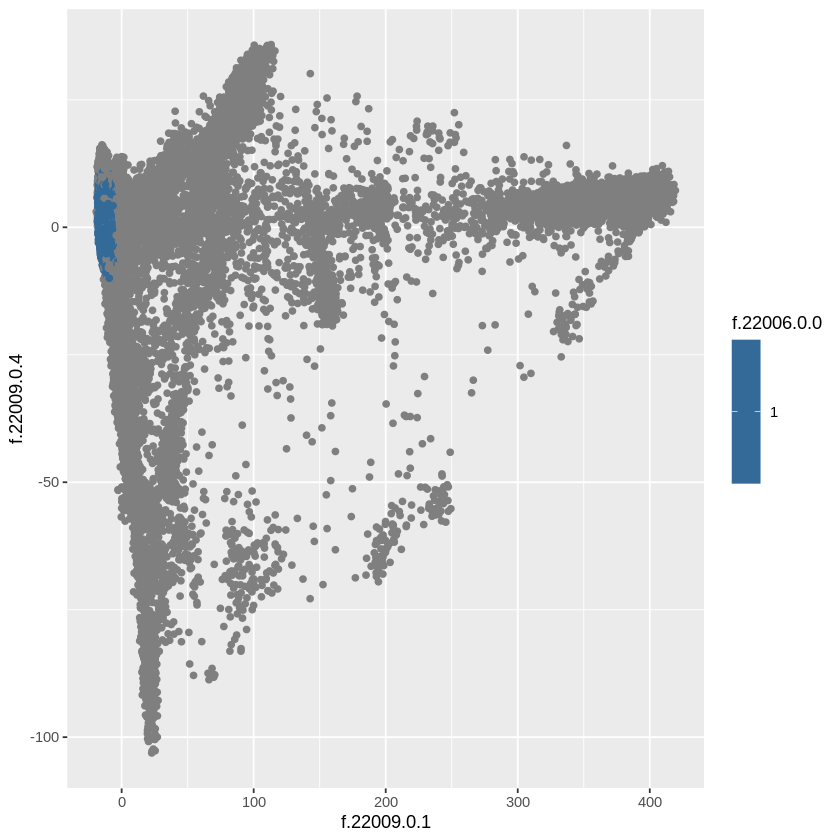

In [26]:
ggplot(cols_pca, aes(x=f.22009.0.1, y=f.22009.0.4))+ geom_point(aes(color=f.22006.0.0))

In [68]:
png(file="PC1vPC2_fulldb_byWES.png", width = 5, height = 5, unit='in', res=300)
ggplot(bd_pca, aes(x=f.22009.0.1, y=f.22009.0.2))+ geom_point(aes(color=WES, shape=WES))+
    labs(title="PC1 vs PC2 total sample by WES",
       x="PC1", y = "PC2") +
    theme_classic()
dev.off()

Warning message:
“Removed 14242 rows containing missing values (geom_point).”


png 
  2

In [45]:
length(which(bd_pca$WES == 1))

[1] 200631

In [ ]:
setwd('/home/dc2325/scratch60/pca/')

In [1]:
fam <- read.table("/gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_s200631.fam", sep=' ', header=F)
pedind <- read.table("/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged.fam", sep='\t', header=F)

# Testing flashPCA

In [15]:
setwd("/home/dc2325/scratch60/pca")

In [16]:
library(flashpcaR)

In [17]:
fn <- "/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged"
fn

[1] "/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged"

In [18]:
f <- flashpca(fn, ndim=10)

In [20]:
head(f$projection)

1000019:1000019,0.06977305,0.0082878876,0.00188748,0.03223197,-0.041737152,0.042694385,-0.028020752,-0.003218252,0.029767902,-0.0534705591
1000035:1000035,-0.02642104,0.0008972824,0.02124188,0.04421901,0.045475997,0.034634255,-0.015119871,-0.002232416,0.004458043,0.0345384444
1000078:1000078,0.02174130,0.0262538933,-0.06440635,-0.05270910,-0.051801780,-0.029892313,-0.007134809,-0.054064208,0.024406447,-0.0213261663
1000081:1000081,-0.02057803,0.0424131660,0.03350652,0.05454286,0.013196859,0.004571951,-0.040360792,0.100594089,0.009668069,0.0089088856
1000198:1000198,0.05370262,0.0138846480,0.02126063,-0.02001493,0.003223822,0.006077779,0.020674849,0.052087752,-0.010226862,-0.0249335219
1000210:1000210,0.08634782,0.0240293370,0.00408172,-0.02581509,-0.020316439,0.006430763,0.076337651,-0.047640127,0.024232942,-0.0009809334


In [21]:
pc <- f$projection

In [26]:
head(pc)

1000019:1000019,0.06977305,0.0082878876,0.00188748,0.03223197,-0.041737152,0.042694385,-0.028020752,-0.003218252,0.029767902,-0.0534705591
1000035:1000035,-0.02642104,0.0008972824,0.02124188,0.04421901,0.045475997,0.034634255,-0.015119871,-0.002232416,0.004458043,0.0345384444
1000078:1000078,0.02174130,0.0262538933,-0.06440635,-0.05270910,-0.051801780,-0.029892313,-0.007134809,-0.054064208,0.024406447,-0.0213261663
1000081:1000081,-0.02057803,0.0424131660,0.03350652,0.05454286,0.013196859,0.004571951,-0.040360792,0.100594089,0.009668069,0.0089088856
1000198:1000198,0.05370262,0.0138846480,0.02126063,-0.02001493,0.003223822,0.006077779,0.020674849,0.052087752,-0.010226862,-0.0249335219
1000210:1000210,0.08634782,0.0240293370,0.00408172,-0.02581509,-0.020316439,0.006430763,0.076337651,-0.047640127,0.024232942,-0.0009809334


In [7]:
head(f$values)

[1] 388.8270 238.1725 195.3710 193.4536 149.7762 146.6109

In [9]:
head(f$vectors)

1000019:1000019,0.003538421,5.370293e-04,0.0001350368,0.002317386,-0.0034103694,0.0035260438,-0.0023432418,-0.0002725443,0.0026201124,-4.716845e-03
1000035:1000035,-0.001339898,5.814111e-05,0.0015197177,0.003179221,0.0037158729,0.0028603738,-0.0012644027,-0.0001890568,0.0003923882,3.046770e-03
1000078:1000078,0.001102573,1.701171e-03,-0.0046078531,-0.003789634,-0.0042327566,-0.0024687463,-0.0005966501,-0.0045785392,0.0021482077,-1.881263e-03
1000081:1000081,-0.001043580,2.748241e-03,0.0023971724,0.003921476,0.0010783238,0.0003775883,-0.0033751805,0.0085190184,0.0008509645,7.858872e-04
1000198:1000198,0.002723437,8.996820e-04,0.0015210591,-0.001439016,0.0002634205,0.0005019516,0.0017289390,0.0044111589,-0.0009001484,-2.199482e-03
1000210:1000210,0.004378982,1.557026e-03,0.0002920204,-0.001856031,-0.0016600693,0.0005311038,0.0063837536,-0.0040345027,0.0021329361,-8.653193e-05


In [11]:
head(f$loadings)

NULL

In [12]:
head(f$scale)

[1] 0.7023566 0.6871513 0.6036333 0.6354529 0.6735529 0.6784860

In [27]:
write.table(f$projection,"/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.pca", sep=" ", row.names=TRUE, col.names=F)

In [8]:
write.table(f$values,"/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.values", sep=" ", row.names=FALSE, col.names=F)

In [10]:
write.table(f$vectors,"/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.vectors", sep=" ", row.names=TRUE, col.names=F)

In [13]:
write.table(f$scale,"/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.scale", sep=" ", row.names=FALSE, col.names=F)

In [6]:
pca <- read.table("/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.pca", sep=" ")

Warning message in file(file, "rt"):
“cannot open file '/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.pca': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [34]:
head(pca)

,ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,IID
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1000019:1000019,0.06977305,0.0082878876,0.00188748,0.03223197,-0.041737152,0.042694385,-0.028020752,-0.003218252,0.029767902,-0.0534705591,1000019
2,1000035:1000035,-0.02642104,0.0008972824,0.02124188,0.04421901,0.045475997,0.034634255,-0.015119871,-0.002232416,0.004458043,0.0345384444,1000035
3,1000078:1000078,0.02174130,0.0262538933,-0.06440635,-0.05270910,-0.051801780,-0.029892313,-0.007134809,-0.054064208,0.024406447,-0.0213261663,1000078
4,1000081:1000081,-0.02057803,0.0424131660,0.03350652,0.05454286,0.013196859,0.004571951,-0.040360792,0.100594089,0.009668069,0.0089088856,1000081
5,1000198:1000198,0.05370262,0.0138846480,0.02126063,-0.02001493,0.003223822,0.006077779,0.020674849,0.052087752,-0.010226862,-0.0249335219,1000198
6,1000210:1000210,0.08634782,0.0240293370,0.00408172,-0.02581509,-0.020316439,0.006430763,0.076337651,-0.047640127,0.024232942,-0.0009809334,1000210


In [31]:
colnames(pca) <- c("ID","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10")

In [33]:
pca$IID <- sapply(strsplit(as.character(pca$ID),':'), "[", 1)

In [35]:
fam <- read.table("/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged.fam", sep=" ")

In [36]:
head(fam)

,V1,V2,V3,V4,V5,V6
,<int>,<int>,<int>,<int>,<int>,<int>
1,1000019,1000019,0,0,2,1
2,1000035,1000035,0,0,1,1
3,1000078,1000078,0,0,2,1
4,1000081,1000081,0,0,1,1
5,1000198,1000198,0,0,2,1
6,1000210,1000210,0,0,1,1


In [38]:
colnames(fam) <- c("FID", "IID", "father", "mother","sex", "pheno")

In [39]:
ind <-merge(fam, pca, by="IID", all=TRUE)

In [45]:
ethnicity <- read.table("/home/dc2325/scratch60/pca/cache/ukb23155_s200631.white_ind.pheno", sep="\t" )

In [48]:
head(ethnicity)

,FID,IID,father,mother,sex,pheno,ethnicity
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000019,1000019,0,0,2,-9,1001
2,1000035,1000035,0,0,1,-9,1001
3,1000078,1000078,0,0,2,-9,1001
4,1000081,1000081,0,0,1,-9,1001
5,1000198,1000198,0,0,2,-9,1001
6,1000210,1000210,0,0,1,-9,1001


In [47]:
colnames(ethnicity) <- c("FID", "IID", "father", "mother","sex", "pheno", "ethnicity")

In [40]:
head(ind)

,IID,FID,father,mother,sex,pheno,ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000019,1000019,0,0,2,1,1000019:1000019,0.06977305,0.0082878876,0.00188748,0.03223197,-0.041737152,0.042694385,-0.028020752,-0.003218252,0.029767902,-0.0534705591
2,1000035,1000035,0,0,1,1,1000035:1000035,-0.02642104,0.0008972824,0.02124188,0.04421901,0.045475997,0.034634255,-0.015119871,-0.002232416,0.004458043,0.0345384444
3,1000078,1000078,0,0,2,1,1000078:1000078,0.02174130,0.0262538933,-0.06440635,-0.05270910,-0.051801780,-0.029892313,-0.007134809,-0.054064208,0.024406447,-0.0213261663
4,1000081,1000081,0,0,1,1,1000081:1000081,-0.02057803,0.0424131660,0.03350652,0.05454286,0.013196859,0.004571951,-0.040360792,0.100594089,0.009668069,0.0089088856
5,1000198,1000198,0,0,2,1,1000198:1000198,0.05370262,0.0138846480,0.02126063,-0.02001493,0.003223822,0.006077779,0.020674849,0.052087752,-0.010226862,-0.0249335219
6,1000210,1000210,0,0,1,1,1000210:1000210,0.08634782,0.0240293370,0.00408172,-0.02581509,-0.020316439,0.006430763,0.076337651,-0.047640127,0.024232942,-0.0009809334


In [55]:
pca_final <-merge(ind, ethnicity, by="IID",all=FALSE)

In [60]:
library(dplyr)
pca_final_r <- pca_final %>% 
    mutate(ethnicity_1 = case_when(
         ethnicity == 1001 ~  "British",
         ethnicity == 1002 ~ "Irish",
         ethnicity == 1003 ~ "Any other white background",
         ethnicity == 9000 ~ "Inconsistent_white",
         ethnicity == 1 ~ "White",
         ethnicity == -1 ~ "Do not know",
         ethnicity == -3 ~ "Prefer not to answer",
         TRUE  ~ ""))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [61]:
head(pca_final_r)

,IID,FID.x,father.x,mother.x,sex.x,pheno.x,ID,PC1,PC2,PC3,⋯,PC8,PC9,PC10,FID.y,father.y,mother.y,sex.y,pheno.y,ethnicity,ethnicity_1
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1000019,1000019,0,0,2,1,1000019:1000019,0.06977305,0.0082878876,0.00188748,⋯,-0.003218252,0.029767902,-0.0534705591,1000019,0,0,2,-9,1001,British
2,1000035,1000035,0,0,1,1,1000035:1000035,-0.02642104,0.0008972824,0.02124188,⋯,-0.002232416,0.004458043,0.0345384444,1000035,0,0,1,-9,1001,British
3,1000078,1000078,0,0,2,1,1000078:1000078,0.02174130,0.0262538933,-0.06440635,⋯,-0.054064208,0.024406447,-0.0213261663,1000078,0,0,2,-9,1001,British
4,1000081,1000081,0,0,1,1,1000081:1000081,-0.02057803,0.0424131660,0.03350652,⋯,0.100594089,0.009668069,0.0089088856,1000081,0,0,1,-9,1001,British
5,1000198,1000198,0,0,2,1,1000198:1000198,0.05370262,0.0138846480,0.02126063,⋯,0.052087752,-0.010226862,-0.0249335219,1000198,0,0,2,-9,1001,British
6,1000210,1000210,0,0,1,1,1000210:1000210,0.08634782,0.0240293370,0.00408172,⋯,-0.047640127,0.024232942,-0.0009809334,1000210,0,0,1,-9,1001,British


In [56]:
head(pca_final)

,IID,FID.x,father.x,mother.x,sex.x,pheno.x,ID,PC1,PC2,PC3,⋯,PC7,PC8,PC9,PC10,FID.y,father.y,mother.y,sex.y,pheno.y,ethnicity
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000019,1000019,0,0,2,1,1000019:1000019,0.06977305,0.0082878876,0.00188748,⋯,-0.028020752,-0.003218252,0.029767902,-0.0534705591,1000019,0,0,2,-9,1001
2,1000035,1000035,0,0,1,1,1000035:1000035,-0.02642104,0.0008972824,0.02124188,⋯,-0.015119871,-0.002232416,0.004458043,0.0345384444,1000035,0,0,1,-9,1001
3,1000078,1000078,0,0,2,1,1000078:1000078,0.02174130,0.0262538933,-0.06440635,⋯,-0.007134809,-0.054064208,0.024406447,-0.0213261663,1000078,0,0,2,-9,1001
4,1000081,1000081,0,0,1,1,1000081:1000081,-0.02057803,0.0424131660,0.03350652,⋯,-0.040360792,0.100594089,0.009668069,0.0089088856,1000081,0,0,1,-9,1001
5,1000198,1000198,0,0,2,1,1000198:1000198,0.05370262,0.0138846480,0.02126063,⋯,0.020674849,0.052087752,-0.010226862,-0.0249335219,1000198,0,0,2,-9,1001
6,1000210,1000210,0,0,1,1,1000210:1000210,0.08634782,0.0240293370,0.00408172,⋯,0.076337651,-0.047640127,0.024232942,-0.0009809334,1000210,0,0,1,-9,1001


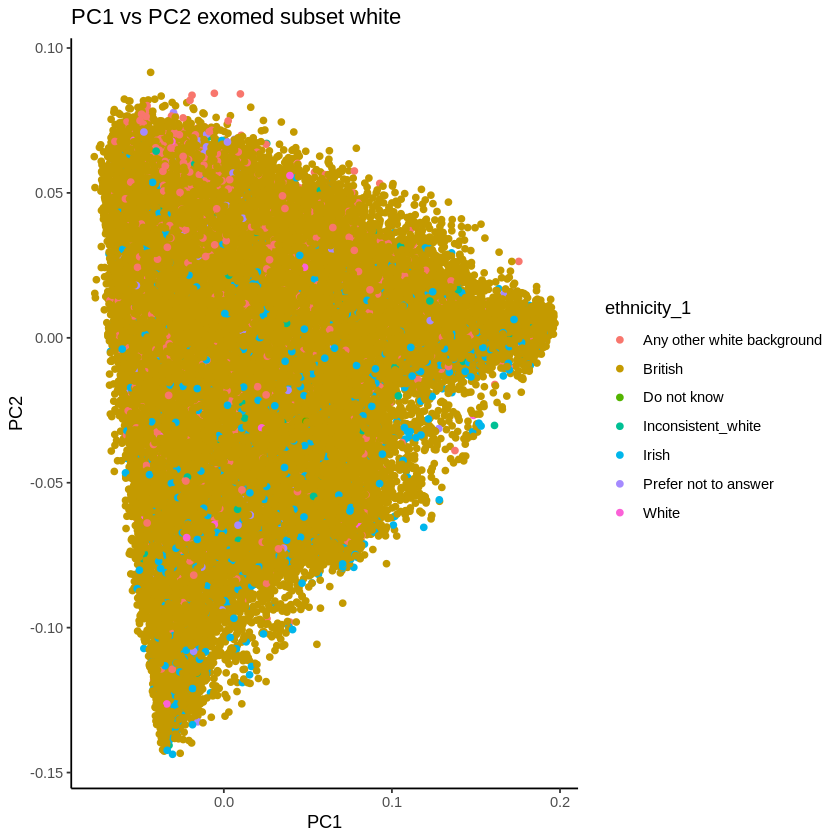

In [64]:
library(ggplot2)
ggplot(pca_final_r, aes(x=PC1, y=PC2))+ geom_point(aes(color=ethnicity_1)) +
    labs(title="PC1 vs PC2 exomed subset white",
       x="PC1", y = "PC2") +
    theme_classic()

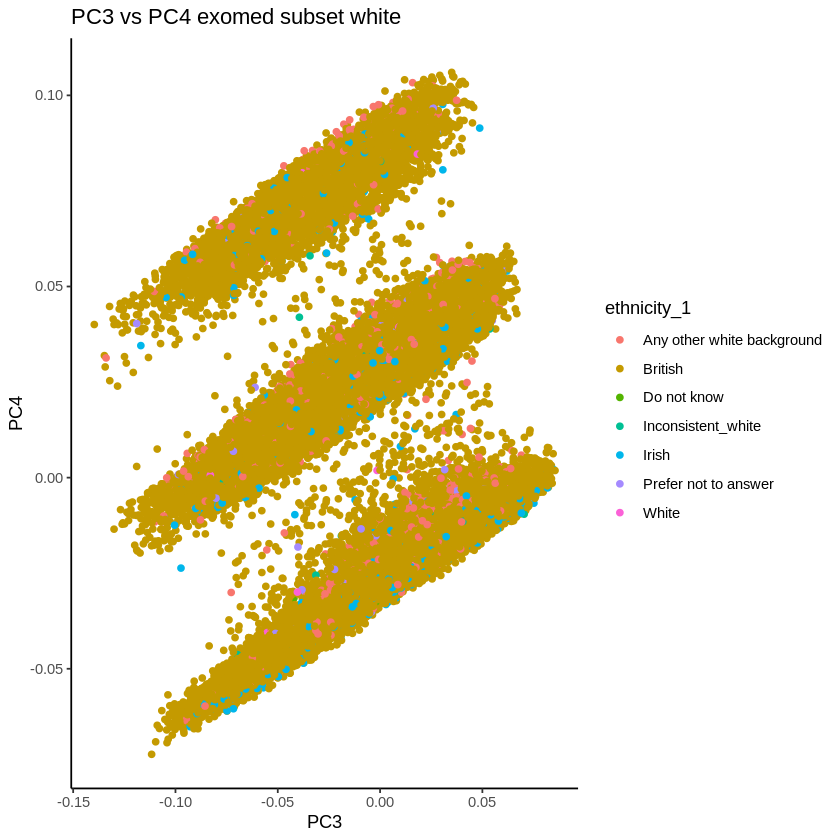

In [68]:
ggplot(pca_final_r, aes(x=PC3, y=PC4))+ geom_point(aes(color=ethnicity_1)) +
    labs(title="PC3 vs PC4 exomed subset white",
       x="PC3", y = "PC4") +
    theme_classic()

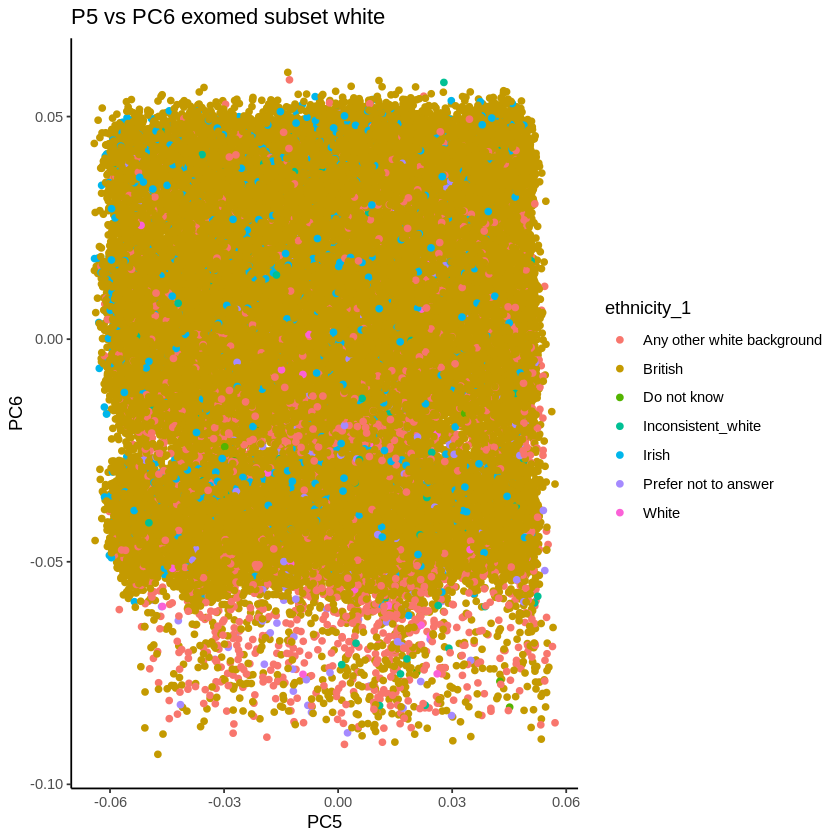

In [70]:
ggplot(pca_final_r, aes(x=PC5, y=PC6))+ geom_point(aes(color=ethnicity_1)) +
    labs(title="P5 vs PC6 exomed subset white",
       x="PC5", y = "PC6") +
    theme_classic()

# Using subset of 50K exomes

`/gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/ukb32285_exomespb.fam`

In [4]:
fam50K <- read.table("/gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/ukb32285_exomespb.fam", sep=" ")
colnames(fam50K) <- c("FID", "IID", "father", "mother","sex", "pheno")

In [5]:
head(fam50K)

,FID,IID,father,mother,sex,pheno
,<int>,<int>,<int>,<int>,<int>,<int>
1,5023838,5023838,0,0,2,-9
2,1129683,1129683,0,0,1,-9
3,4744741,4744741,0,0,1,-9
4,1258289,1258289,0,0,2,-9
5,1333104,1333104,0,0,2,-9
6,2204914,2204914,0,0,2,-9


In [ ]:
pca_50K <-merge(pca_final_r, fam50K, by="IID",all.y=TRUE)
nrow(pca_50K)
head(pca_50K)

# Making nicer PCA plots

In [22]:
setwd("/home/dc2325/scratch60/pca")
pca <- read.table("ukb23155_s200631.filtered.merged.prune.pca", sep="\t", header=TRUE)

In [23]:
head(pca)

,IID,FID.x,father.x,mother.x,sex.x,pheno.x,ID,PC1,PC2,PC3,⋯,PC8,PC9,PC10,FID.y,father.y,mother.y,sex.y,pheno.y,ethnicity,ethnicity_1
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000019,1000019,0,0,2,-9,1000019:1000019,0.01553941,0.02393847,-0.007491376,⋯,-0.0008964522,0.005746197,-0.001042337,1000019,0,0,2,-9,1001,British
2,1000035,1000035,0,0,1,-9,1000035:1000035,0.01253709,-0.02193925,0.003917083,⋯,-0.0101081273,0.003216692,-0.011721235,1000035,0,0,1,-9,1001,British
3,1000078,1000078,0,0,2,-9,1000078:1000078,0.01497620,0.01950002,0.013263954,⋯,0.0199936269,-0.004632490,-0.004389401,1000078,0,0,2,-9,1001,British
4,1000081,1000081,0,0,1,-9,1000081:1000081,-0.12213015,0.03863465,0.003532455,⋯,-0.0108502715,0.015511705,0.006788431,1000081,0,0,1,-9,1001,British
5,1000198,1000198,0,0,2,-9,1000198:1000198,0.01218179,0.02232563,-0.007680613,⋯,-0.0026506194,-0.012875036,0.004556960,1000198,0,0,2,-9,1001,British
6,1000210,1000210,0,0,1,-9,1000210:1000210,0.02526840,0.03664394,0.001277694,⋯,-0.0023364127,0.016794410,-0.012663409,1000210,0,0,1,-9,1001,British


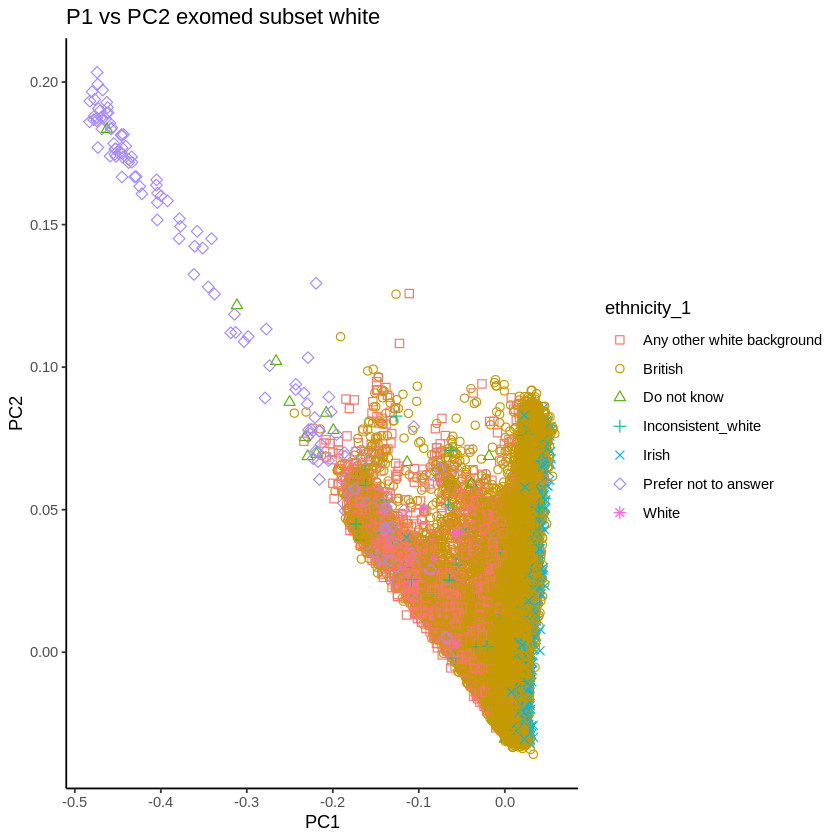

In [41]:
library(ggplot2)
ggplot(pca, aes(x=PC1, y=PC2))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1), size=2) +
    labs(title="P1 vs PC2 exomed subset white",
       x="PC1", y = "PC2") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()

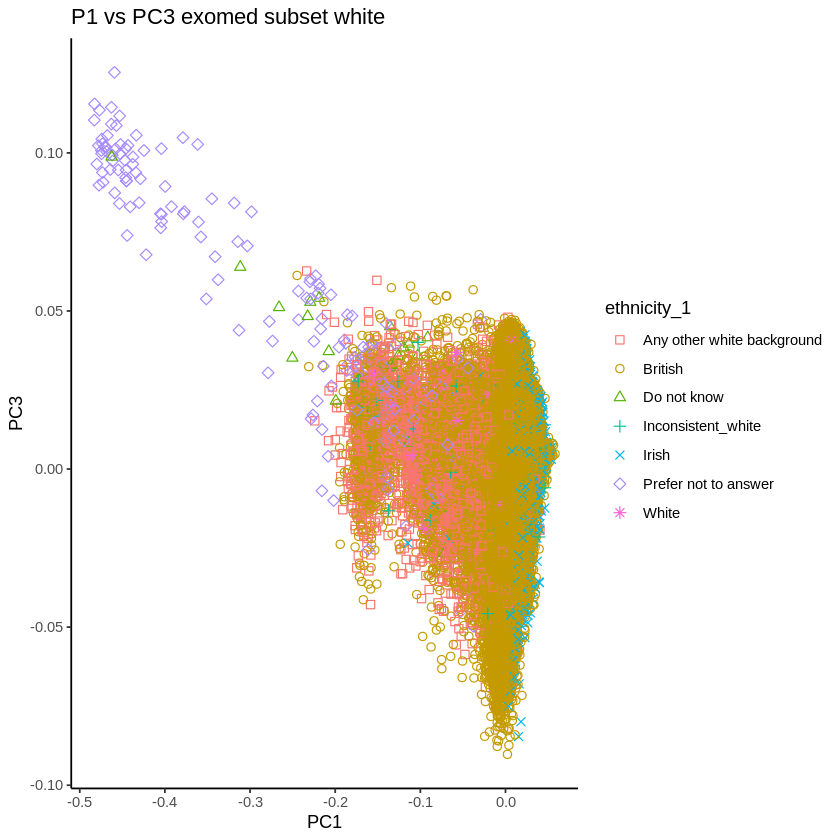

In [47]:
library(ggplot2)
ggplot(pca, aes(x=PC1, y=PC3))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1, fill=ethnicity_1), size=2) +
    labs(title="P1 vs PC3 exomed subset white",
       x="PC1", y = "PC3") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()

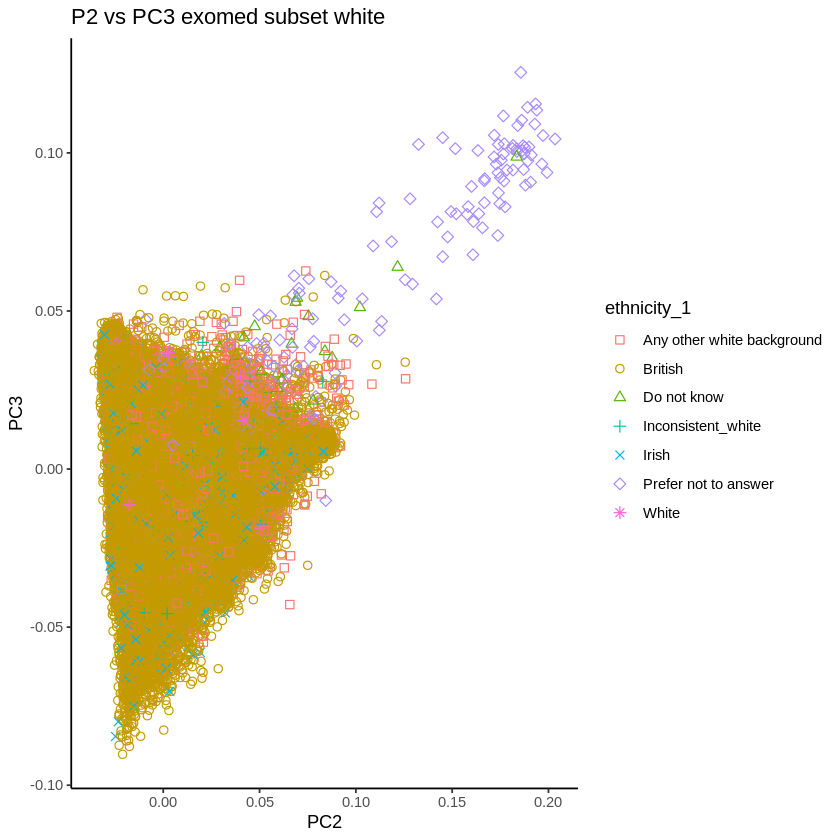

In [48]:
library(ggplot2)
ggplot(pca, aes(x=PC2, y=PC3))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1, fill=ethnicity_1), size=2) +
    labs(title="P2 vs PC3 exomed subset white",
       x="PC2", y = "PC3") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()

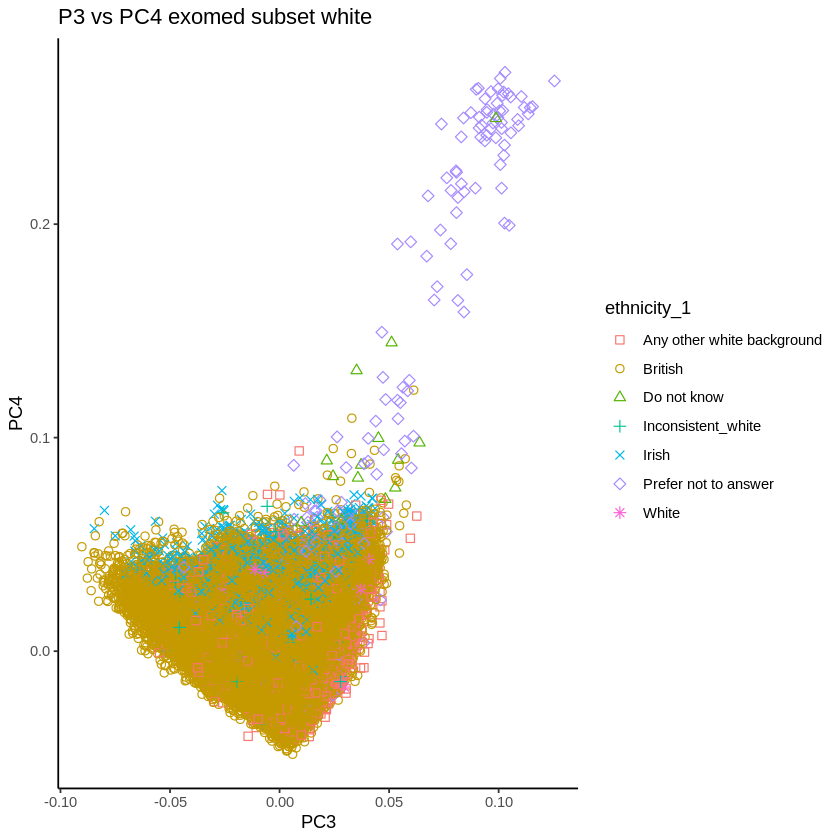

In [43]:
library(ggplot2)
ggplot(pca, aes(x=PC3, y=PC4))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1, fill=ethnicity_1), size=2) +
    labs(title="P3 vs PC4 exomed subset white",
       x="PC3", y = "PC4") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()

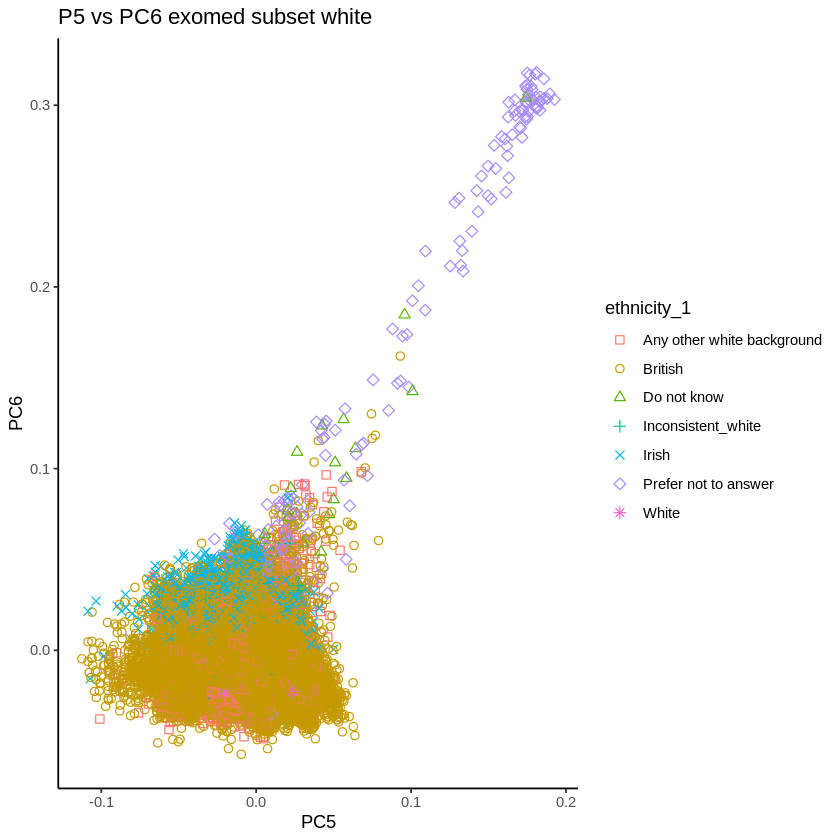

In [44]:
library(ggplot2)
ggplot(pca, aes(x=PC5, y=PC6))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1, fill=ethnicity_1), size=2) +
    labs(title="P5 vs PC6 exomed subset white",
       x="PC5", y = "PC6") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()

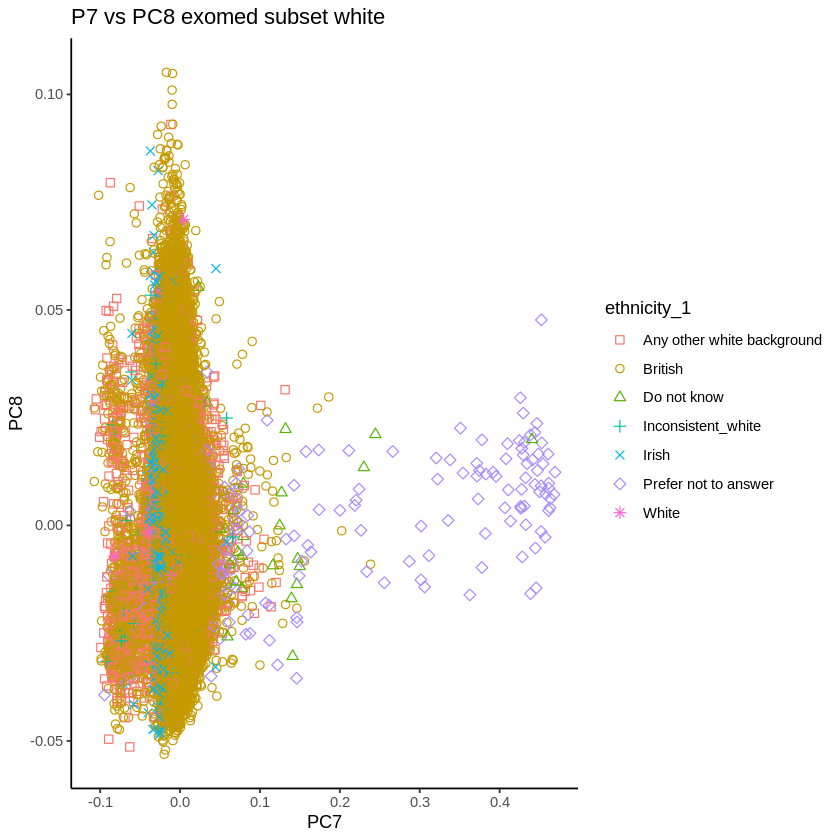

In [45]:
library(ggplot2)
ggplot(pca, aes(x=PC7, y=PC8))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1, fill=ethnicity_1), size=2) +
    labs(title="P7 vs PC8 exomed subset white",
       x="PC7", y = "PC8") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()

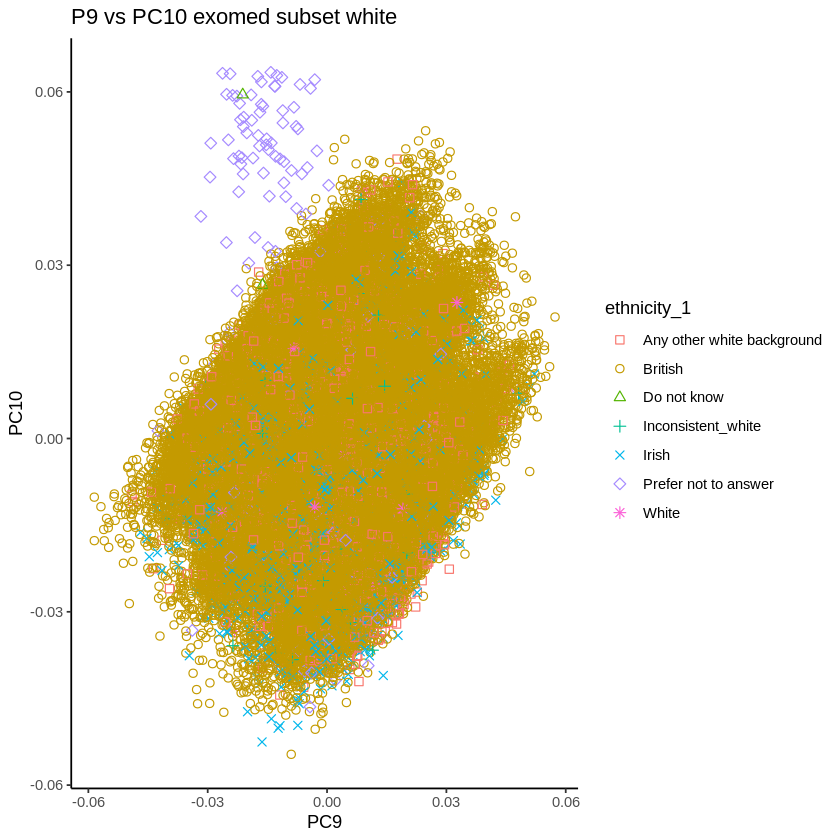

In [46]:
library(ggplot2)
ggplot(pca, aes(x=PC9, y=PC10))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1, fill=ethnicity_1), size=2) +
    labs(title="P9 vs PC10 exomed subset white",
       x="PC9", y = "PC10") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()